In [1]:
import pandas as pd

In [2]:
ad = pd.read_csv('Advertising.csv')
print(ad)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.1

In [3]:
ad=(ad - ad.min()) / (ad.max() - ad.min())*1000
print(ad)

      Unnamed: 0          TV       Radio    Newspaper        Sales
0       0.000000  775.786270  762.096774   605.980651   807.086614
1       5.025126  148.123098  792.338710   394.019349   346.456693
2      10.050251   55.799797  925.403226   606.860158   303.149606
3      15.075377  509.976327  832.661290   511.873351   665.354331
4      20.100503  609.063240  217.741935   510.993843   444.881890
5      25.125628   27.054447  985.887097   656.992084   220.472441
6      30.150754  192.086574  661.290323   204.045734   401.574803
7      35.175879  404.125803  395.161290    99.384345   456.692913
8      40.201005   26.716266   42.338710     6.156552   125.984252
9      45.226131  673.317552   52.419355   183.817062   354.330709
10     50.251256  221.170105  116.935484   210.202287   275.590551
11     55.276382  723.706459  483.870968    32.541777   622.047244
12     60.301508   78.119716  707.661290   576.956904   299.212598
13     65.326633  327.358810  153.225806    60.686016   318.89

In [4]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = ad[feature_cols]
X = ad[['TV', 'Radio', 'Newspaper']]
y = ad.Sales
y = ad['Sales']

In [5]:
X_train,X_test, y_train, y_test = (X[:140],X[141:], y[:140],y[141:])

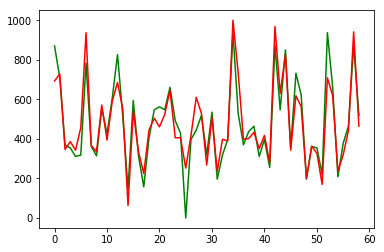

In [6]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train.astype('int'))
y_pred = tree.predict(X_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(y_pred)),y_pred,'g',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.show()

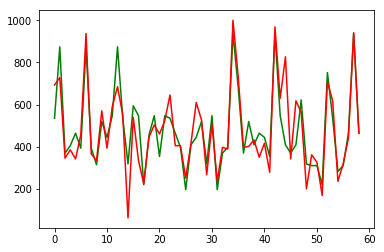

In [7]:
from xgboost import XGBClassifier
model = XGBClassifier()               # 载入模型（模型命名为model)
model.fit(X_train,y_train)            # 训练模型（训练集）
y_pred = model.predict(X_test)        # 模型预测（测试集），y_pred为预测结果
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(y_pred)),y_pred,'g',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.show()

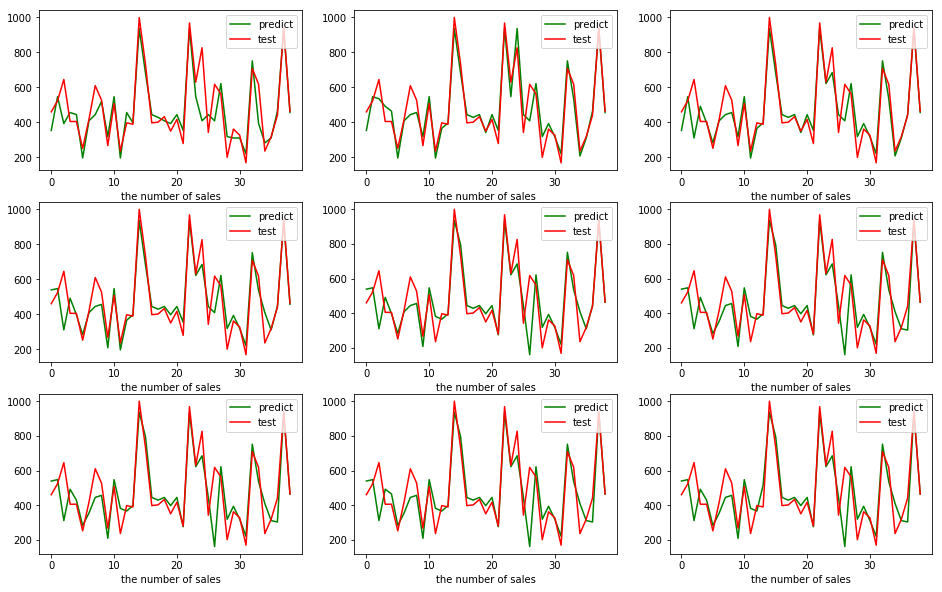

In [8]:
X_train,X_test, y_train, y_test = (X[:160],X[161:], y[:160],y[161:])
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
fig=plt.figure(figsize=(16,10))
for i in range(9):
    a = 100+100*i

    model = XGBClassifier(n_estimators=a)             
    model.fit(X_train,y_train)        
    y_pred = model.predict(X_test)   
    
    plt.subplot(3,3,i+1)
    plt.plot(range(len(y_pred)),y_pred,'g',label="predict")
    plt.plot(range(len(y_pred)),y_test,'r',label="test")
    plt.legend(loc="upper right") #显示图中的标签
    plt.xlabel("the number of sales")
plt.show()